In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv'
data = pd.read_csv(url)

In [2]:
# Display basic information about the dataset
print(data.head())
print(data.info())

   Age  Gender (Female=0, Male=1)  Height (cm)  Weight (kg)  Body Mass Index  \
0   60                          0          150           80            35.56   
1   55                          0          154           73            30.78   
2   53                          1          170          101            34.95   
3   33                          1          175           95            31.02   
4   23                          1          162           68            25.91   

   Waist Circumference (cm)  Hip Circumference (cm)  Diabetes (No=0, Yes=1)  \
0                     119.0                   104.0                       0   
1                     101.0                    98.0                       0   
2                     116.0                   112.0                       1   
3                     114.0                   114.0                       1   
4                     101.0                    97.0                       0   

   Smoking Status(Not Smoking=0, Smoking=1) 

In [3]:
# Define input and output variables
X = data.drop(columns=["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"])
y = data["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')  # You can tune n_neighbors as needed
knn.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [6]:
# Make predictions
y_pred = knn.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [8]:
# Print performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Classification Report:')
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.7143
Precision: 0.7769
Recall: 0.8145
F1 Score: 0.7953
Confusion Matrix:
[[ 29  29]
 [ 23 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        58
           1       0.78      0.81      0.80       124

    accuracy                           0.71       182
   macro avg       0.67      0.66      0.66       182
weighted avg       0.71      0.71      0.71       182



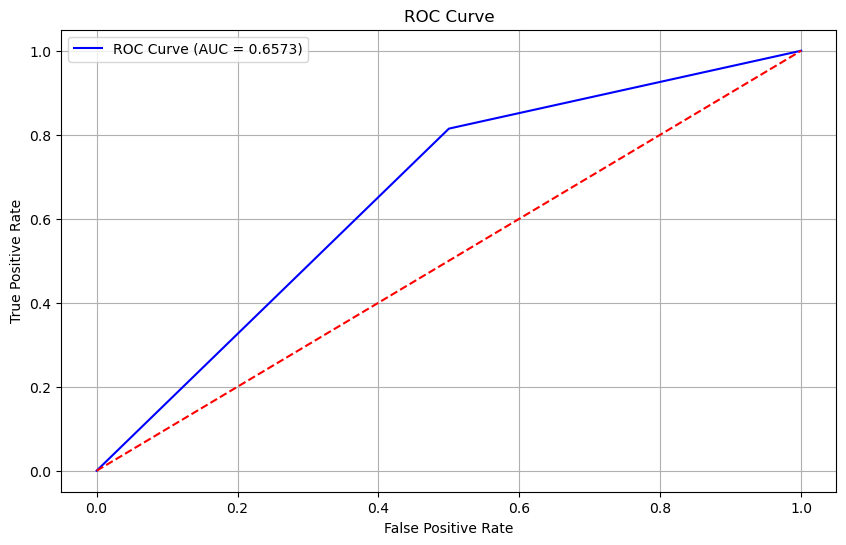

In [9]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

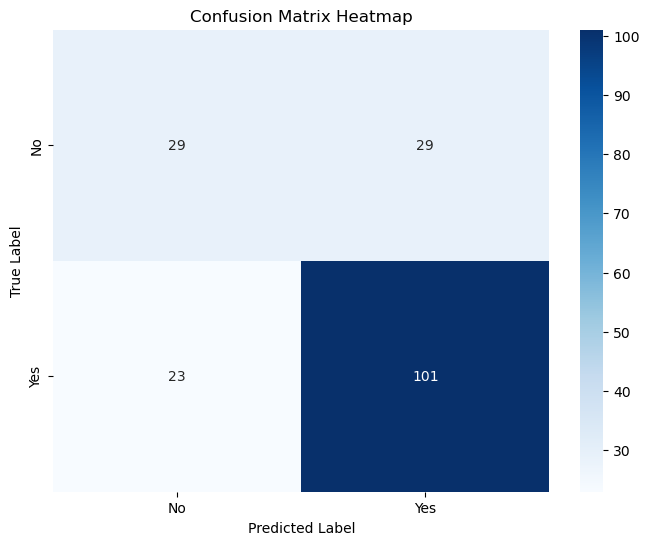

In [10]:
# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()